In [ ]:
This is the glass identification dataset. It has 9 features and 214 instances.

## 1. Import packages and classes

Import all the required libraries :

In [122]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


## 2. Import the data


In [101]:

bank_data = pd.read_csv("resources/bank-full.csv",sep=';',quotechar='"')
                    


## checking the row of the dataframe

In [89]:
print(bank_data.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


## checking the basic statistics

In [90]:
print(bank_data.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

## checking if there is any missing data

In [91]:
print(bank_data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


## Explore the data
printing out the target and feature names

In [92]:
print(bank_data.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


## 3. Split the data

In [116]:
feature_cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']
X = bank_data[feature_cols]
y = bank_data['y']


In [ ]:
X = pd.get_dummies(X, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [117]:
print(X)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [119]:
print(y)

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object


In [123]:
# create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "entropy")

# train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

ValueError: at least one array or dtype is required

In [124]:
y_pred = clf.predict(X_test)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

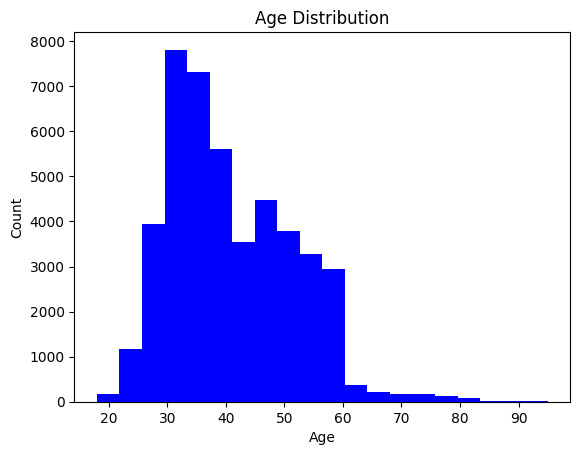

In [103]:
# Plot a histogram of the 'age' column
plt.hist(bank_data['age'], bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

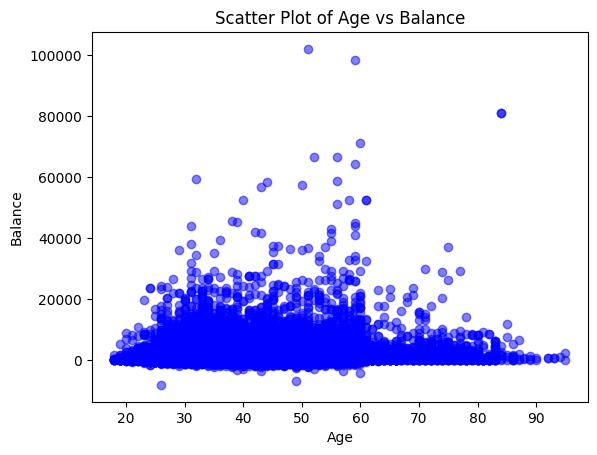

In [104]:
# Create a scatter plot of 'age' vs 'balance'
plt.scatter(bank_data['age'], bank_data['balance'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

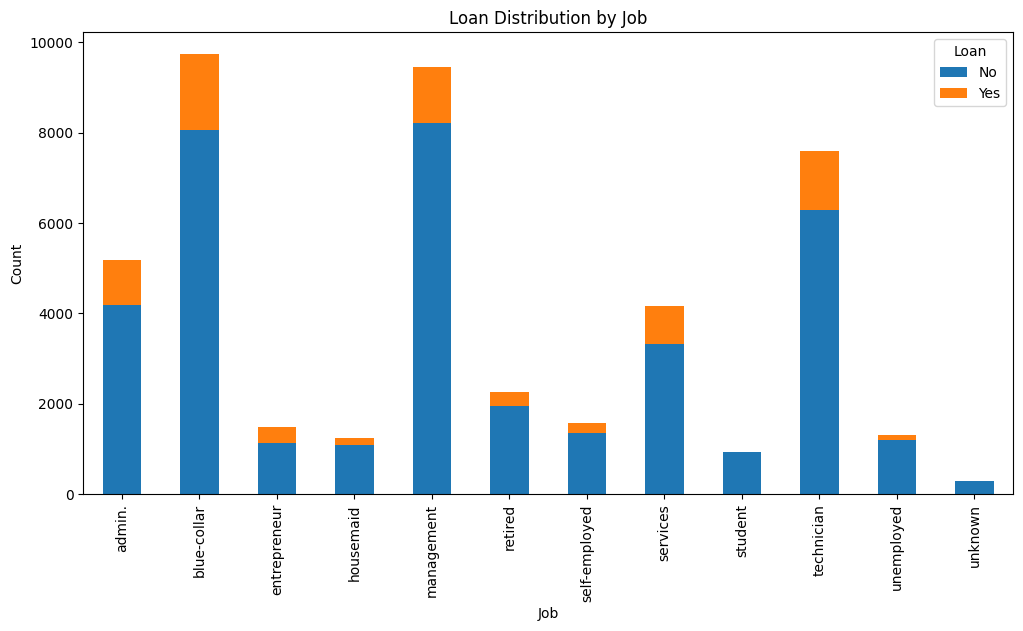

In [107]:
job_loan_counts = bank_data.groupby(['job', 'loan']).size().unstack().fillna(0)

# Create a bar chart
ax = job_loan_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.set_title('Loan Distribution by Job')
ax.set_xlabel('Job')
ax.set_ylabel('Count')
ax.legend(title='Loan', labels=['No', 'Yes'])
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()


In [110]:
model = LogisticRegression().fit(X,y)

In [111]:
y_pred = model.predict(X)

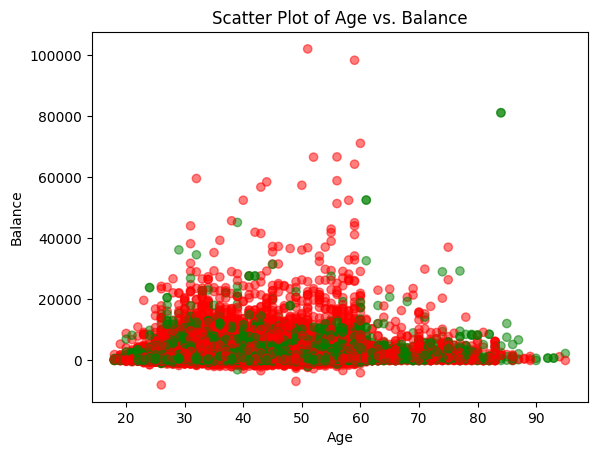

In [114]:
plt.scatter(bank_data['age'], bank_data['balance'], c=bank_data['y'].map({'no': 'red', 'yes': 'green'}), alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot of Age vs. Balance')
plt.show()
